In [9]:
pip install matplotlib

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
Heart_diz = pd.read_csv("/content/heart_disease.csv")

In [12]:
Heart_diz

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


In [13]:
Heart_diz.shape

(4238, 16)

In [14]:
Heart_diz.drop(columns=['BPMeds'], inplace=True)

**DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS FOR HEART DISEASE DETECTION**

In [15]:
Heart_diz.head()

,Gender,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [16]:
Heart_diz.tail()

,Gender,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
4233,Male,50,uneducated,1,1.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No
4237,Female,52,primaryschool,0,0.0,no,0,0,269.0,133.5,83.0,21.47,80.0,107.0,No


In [17]:
Heart_diz.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'],
      dtype='object')

In [18]:
Heart_diz["Heart_ stroke"].value_counts(normalize=True)*100

No     84.804153
yes    15.195847
Name: Heart_ stroke, dtype: float64

<Axes: >

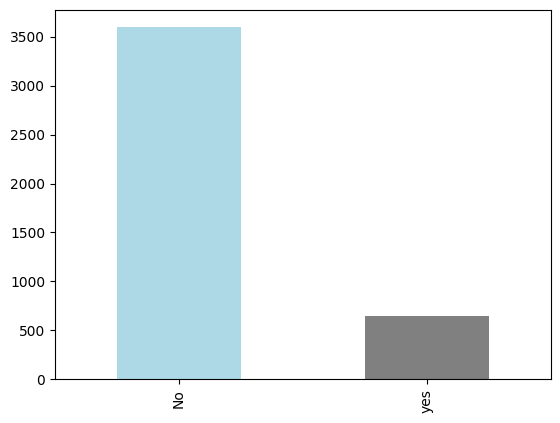

In [19]:
Heart_diz["Heart_ stroke"].value_counts().plot(kind="bar", color=["lightblue", "grey"])

In [20]:
Heart_diz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   prevalentStroke  4238 non-null   object 
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  Heart_ stroke    4238 non-null   object 
dtypes: float64(7), int64(4), object(4)
memory usage: 496.8+ KB


In [21]:
Heart_diz.isna().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [22]:
Heart_diz.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0
sysBP,4238.0,132.352407,22.038097,83.50,117.00,128.0,144.000,295.0
diaBP,4238.0,82.893464,11.910850,48.00,75.00,82.0,89.875,142.5
BMI,4219.0,25.802008,4.080111,15.54,23.07,25.4,28.040,56.8
heartRate,4237.0,75.878924,12.026596,44.00,68.00,75.0,83.000,143.0


In [23]:
pd.crosstab(Heart_diz["Heart_ stroke"], Heart_diz["Gender"])


Gender,Female,Male
Heart_ stroke,,
No,2118,1476
yes,301,343


<Axes: xlabel='Heart_ stroke'>

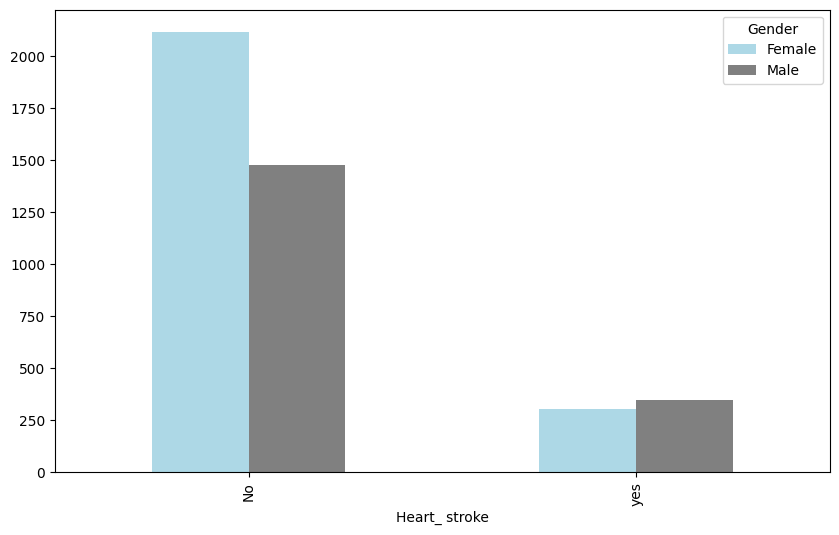

In [24]:
pd.crosstab(Heart_diz["Heart_ stroke"], Heart_diz["Gender"]).plot(kind="bar",
                                                                  figsize=(10,6),
                                                                  color=["lightblue", "grey"])

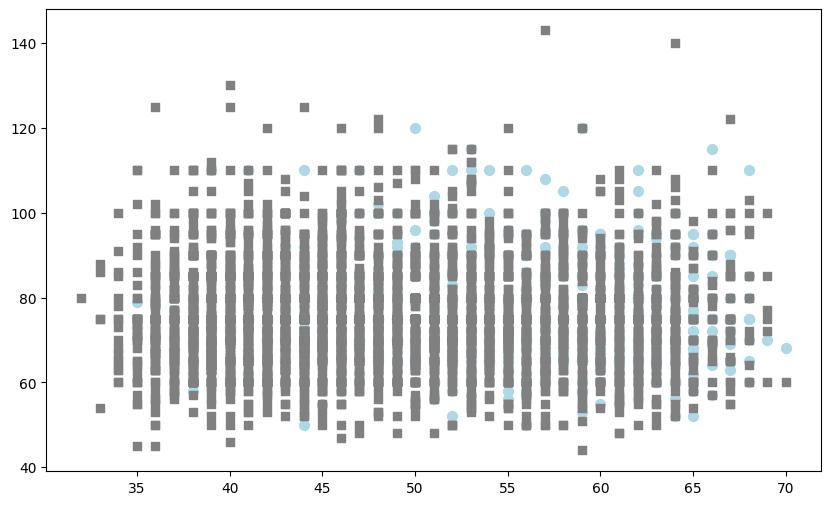

In [25]:
plt.figure(figsize=(10,6))

# population with Heart diseases
plt.scatter(Heart_diz.age[Heart_diz["Heart_ stroke"] == "yes"],
            Heart_diz.heartRate[Heart_diz["Heart_ stroke"] == "yes"],
            c="lightblue",
            marker="o",
            s=50,
            label="Heart disease")

# population without heart diseases
plt.scatter(Heart_diz.age[Heart_diz["Heart_ stroke"] == "No"],
            Heart_diz.heartRate[Heart_diz["Heart_ stroke"] == "No"],
            color="grey",
            marker="s",
            label="No Heart Diseases")

<Axes: ylabel='Frequency'>

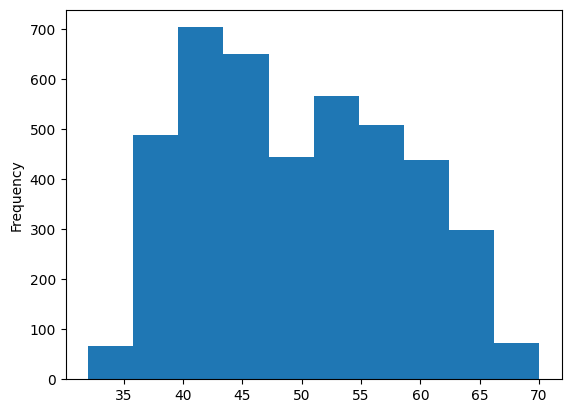

In [26]:
Heart_diz.age.plot.hist()

In [27]:
from scipy.stats import shapiro
age_Heart_diz = Heart_diz["age"]

# performing Shapiro-Wilk test
statistic, p_value = shapiro(age_Heart_diz)

# set the significance level
alpha_sig = 0.05
print("Shapiro-Wilk Test Results:")
print(f"Test Statistic: {statistic}")
print(f"P_value: {p_value}")

if p_value < alpha_sig:
    print("The data does not follows a normal distribution (reject the null hypothesis)")
else:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")

Shapiro-Wilk Test Results:
Test Statistic: 0.9669737219810486
P_value: 3.923861080671942e-30
The data does not follows a normal distribution (reject the null hypothesis)


In [28]:
pd.crosstab(Heart_diz["prevalentHyp"], Heart_diz["Heart_ stroke"])

Heart_ stroke,No,yes
prevalentHyp,,
0,2603,319
1,991,325


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

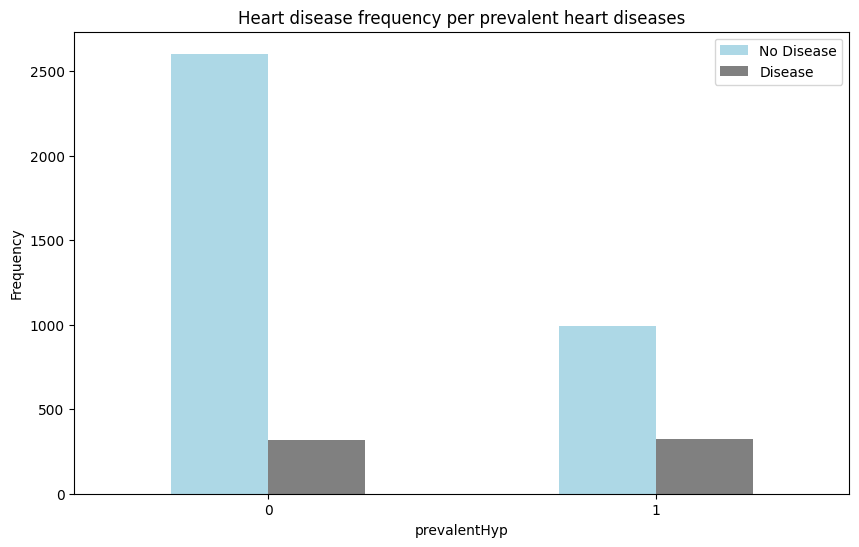

In [29]:
pd.crosstab(Heart_diz["prevalentHyp"], Heart_diz["Heart_ stroke"]).plot(kind="bar",
                                                                       figsize=(10,6),
                                                                       color=["lightblue", "grey"])

plt.title("Heart disease frequency per prevalent heart diseases")
plt.xlabel("prevalentHyp")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

In [30]:
corr_matrix = Heart_diz.corr()
corr_matrix

<ipython-input-30-cd992c6eb661>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Heart_diz.corr()


,age,currentSmoker,cigsPerDay,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.000000,-0.213748,-0.192791,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256
currentSmoker,-0.213748,1.000000,0.769690,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826
cigsPerDay,-0.192791,0.769690,1.000000,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960
prevalentHyp,0.307194,-0.103260,-0.066146,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834
diabetes,0.101258,-0.044295,-0.037067,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627
totChol,0.262131,-0.046562,-0.026320,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408
sysBP,0.394302,-0.130230,-0.088780,0.696755,0.111283,0.208908,1.000000,0.784002,0.326981,0.182246,0.140621
diaBP,0.206104,-0.107746,-0.056632,0.615751,0.050329,0.165182,0.784002,1.000000,0.377588,0.181255,0.061231
BMI,0.135800,-0.167650,-0.092856,0.301318,0.087036,0.115767,0.326981,0.377588,1.000000,0.067678,0.087377
heartRate,-0.012823,0.062356,0.075157,0.147261,0.048994,0.091125,0.182246,0.181255,0.067678,1.000000,0.094500


<ipython-input-31-dca132b287c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Heart_diz.corr()


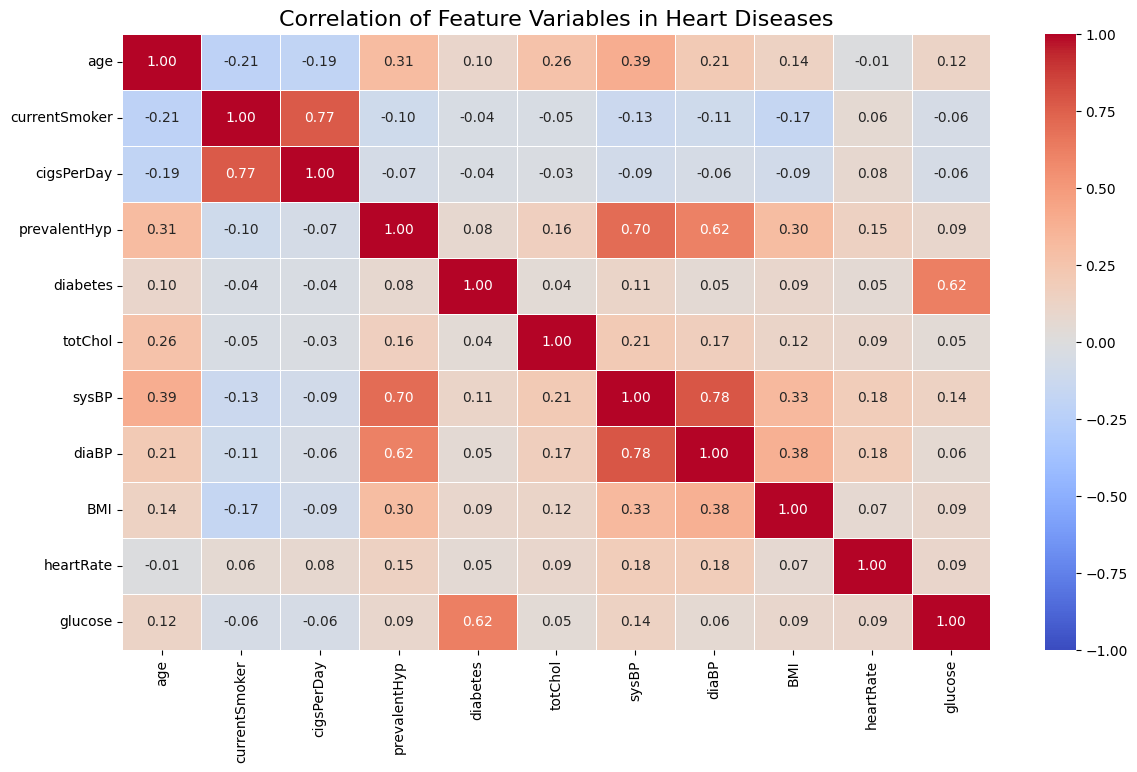

In [31]:
corr_matrix = Heart_diz.corr()
plt.subplots(figsize=(14, 8))
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
            annot=True, linewidth=0.5,vmin=-1,vmax=1,cmap="coolwarm",
            fmt=".2f")
plt.title("Correlation of Feature Variables in Heart Diseases", fontsize=16)
plt.show()

**HANDLING THE MISSING VALUES IN THE HEART DISEASES DATA**

In [32]:
# filling the missing categorical variable in the dataset
from sklearn.impute import SimpleImputer
cat_variables = ["education"]
Heart_diz[cat_variables] = Heart_diz[cat_variables].fillna("unknown")

# Filling categorical missing variables in the dataset
num_variables = ["cigsPerDay", "totChol", "BMI", "heartRate", "glucose"]
imputer = SimpleImputer(strategy="mean")
Heart_diz[num_variables] = imputer.fit_transform(Heart_diz[num_variables])

In [33]:
Heart_diz.isna().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

**DATA TRANSFORMATION OF HEART DISEASE VARIABLES**

In [34]:
# Converting categorical variables into numerical variables
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
Heart_diz["Gender"] = label_enc.fit_transform(Heart_diz["Gender"])
Heart_diz["education"] = label_enc.fit_transform(Heart_diz["education"])
Heart_diz["prevalentStroke"] = label_enc.fit_transform(Heart_diz["prevalentStroke"])
Heart_diz["Heart_ stroke"] = label_enc.fit_transform(Heart_diz["Heart_ stroke"])


In [35]:
Heart_diz.head()

,Gender,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,1,39,1,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,3,1,20.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,0,1,30.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,0,1,23.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [36]:
Heart_diz.groupby("Gender").mean()

,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
Gender,,,,,,,,,,,,,,
0,49.800331,1.968582,0.408433,5.739994,0.006201,0.308392,0.023563,239.410925,133.040099,82.295163,25.514311,77.094667,81.851560,0.124432
1,49.298516,2.087411,0.608026,13.342520,0.005498,0.313359,0.028587,233.145163,131.437878,83.689115,26.184601,74.262165,82.119943,0.188565


<Axes: xlabel='Gender'>

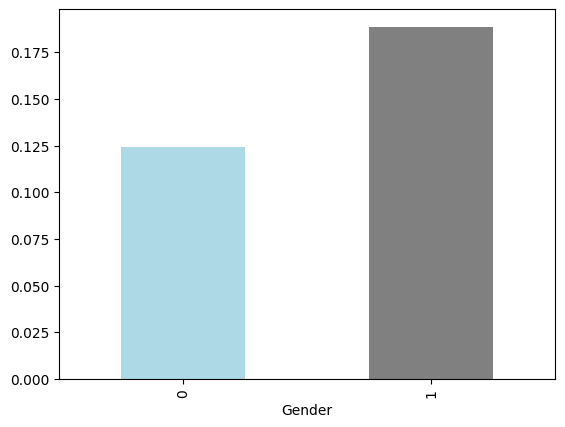

In [37]:
Heart_diz.groupby("Gender")["Heart_ stroke"].mean().plot(kind="bar", color=["lightblue","grey"])

**Importing Necessary Libraries and splitting the data into Training and Test sets**

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [39]:
X = Heart_diz.drop("Heart_ stroke", axis=1)
y = Heart_diz["Heart_ stroke"].values

In [40]:
X.head()

,Gender,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,1,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,3,1,20.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,0,1,30.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,0,1,23.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [41]:
y

array([0, 0, 0, ..., 0, 0, 0])

**Feature Scaling Using Min-Max (Normalization) Scaling**

In [42]:
# instantiating the standard scaler
scaler = MinMaxScaler()

# fit and transform the features
X_new = scaler.fit_transform(X)

# Convert the scaled features into a dataFrame
X_new_df = pd.DataFrame(X_new, columns=X.columns)

In [43]:
X_new_df

,Gender,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.184211,0.25,0.0,0.000000,0.0,0.0,0.0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.0,0.368421,0.50,0.0,0.000000,0.0,0.0,0.0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695
2,1.0,0.421053,0.75,1.0,0.285714,0.0,0.0,0.0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.0,0.763158,0.00,1.0,0.428571,0.0,1.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.0,0.368421,0.00,1.0,0.328571,0.0,0.0,0.0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,0.473684,0.75,1.0,0.014286,0.0,1.0,0.0,0.349745,0.451537,0.465608,0.252787,0.222222,0.129944
4234,1.0,0.500000,0.00,1.0,0.614286,0.0,0.0,0.0,0.169779,0.203310,0.338624,0.101066,0.212121,0.079096
4235,0.0,0.421053,0.50,1.0,0.285714,0.0,0.0,0.0,0.239389,0.224586,0.253968,0.156568,0.404040,0.129944
4236,0.0,0.315789,0.75,1.0,0.214286,0.0,0.0,0.0,0.174873,0.203310,0.412698,0.087736,0.424242,0.118550


**Visualizing the Correlations between the Feature Variables**

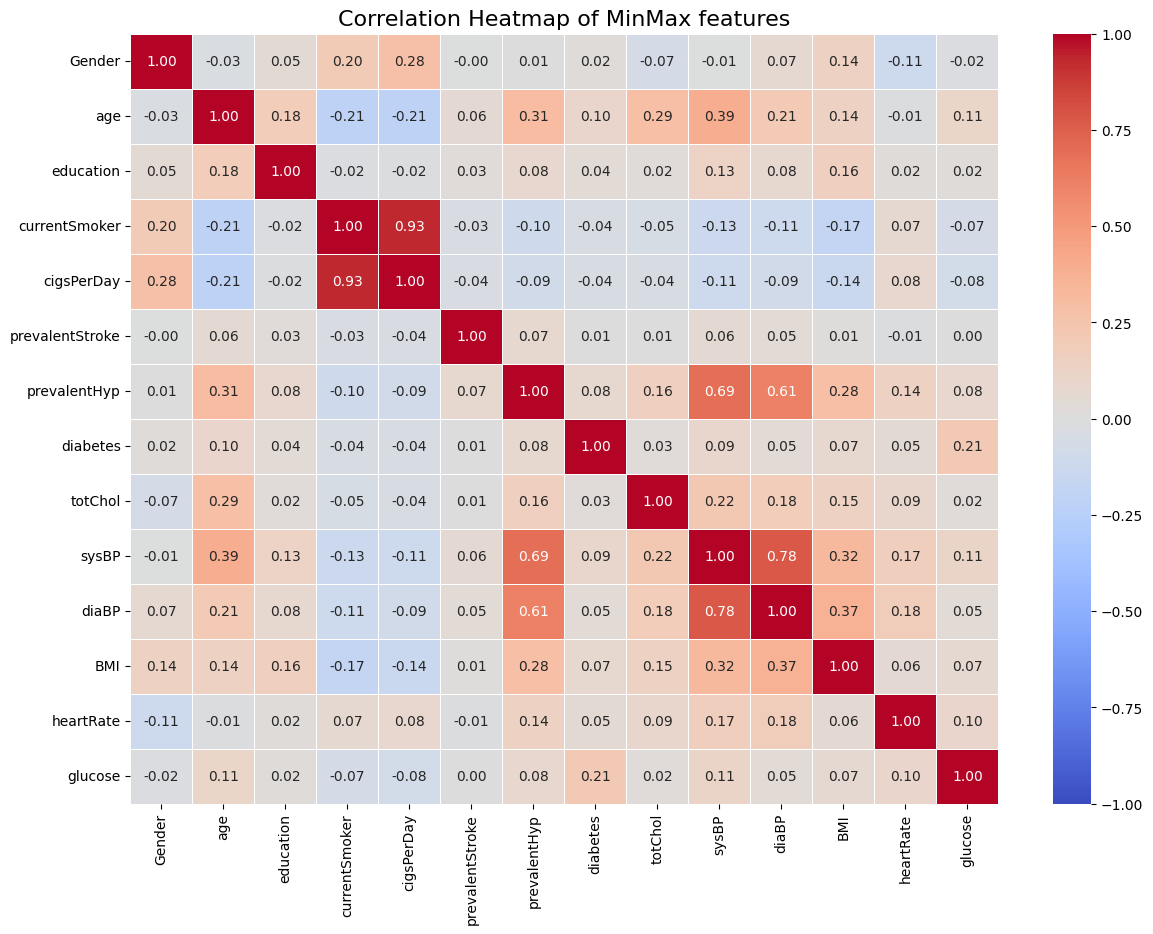

In [44]:
corr_mat = X_new_df.corr(method="spearman")

# create the correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=True,
            cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Correlation Heatmap of MinMax features", fontsize=16)
plt.show()

 **FEATURE SELECTION TECHNIQUE USING CHI SQUARE TEST**

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Instantiating the number of features for modeling
select_features = SelectKBest(score_func=chi2, k=14)
X_KBest_features = select_features.fit_transform(X_new_df, y)

# Get selected indices into an array
select_features_mask = select_features.get_support()
select_features_names = X_new_df.columns[select_features_mask]
print("New Features: ", select_features_names)  # Corrected the variable name in the print statement

# Convert X_KBest_features into a DataFrame of selected features
X_KBest_df = pd.DataFrame(X_KBest_features, columns=select_features_names)


New Features:  Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')


**BALANCING OF HEART DISEASE DATA USING SMOTE TECHNIQUE**

In [46]:
sm = SMOTE(sampling_strategy="auto", random_state=0)
X_resampled, y_resampled = sm.fit_resample(X_KBest_df, y)

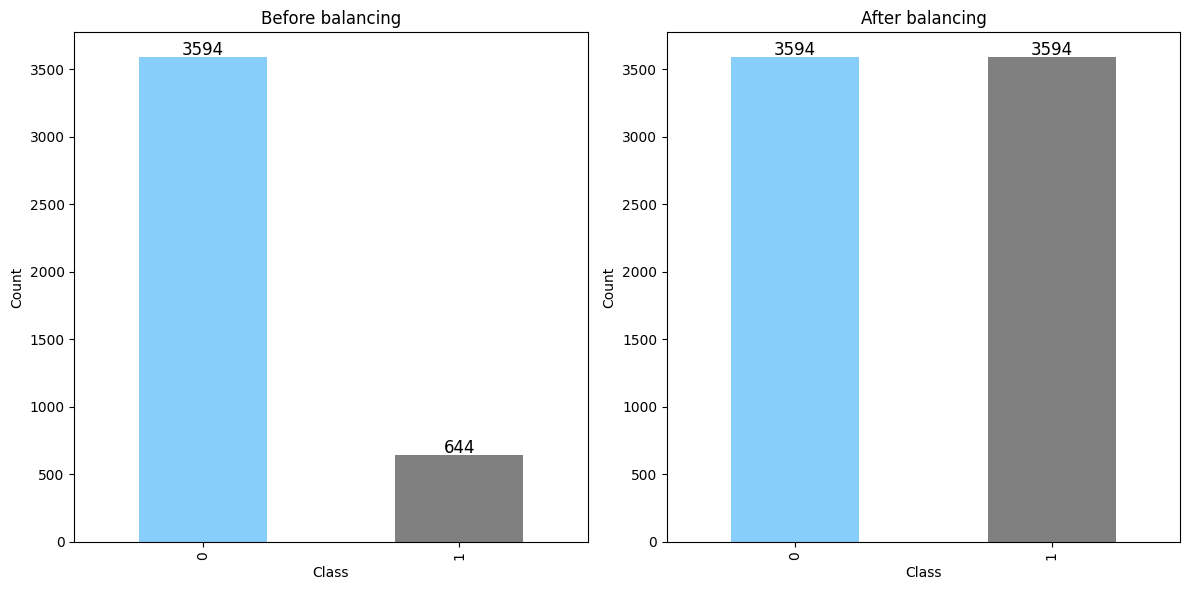

In [47]:
# adding count labels on top of the bars
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Plot the value counts with a bar graph before SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = pd.Series(y).value_counts().plot(kind="bar", color=["lightskyblue", "grey"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Before balancing")
add_count_labels(ax1)

# Plot the value counts with a bar graph after SMOTE
plt.subplot(1, 2, 2)
ax2 = pd.Series(y_resampled).value_counts().plot(kind="bar", color=["lightskyblue", "grey"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("After balancing")
add_count_labels(ax2)

plt.tight_layout()
plt.show()


In [48]:
X_resampled, len(X_resampled)

(      Gender       age  education  currentSmoker  cigsPerDay  prevalentStroke  \
 0        1.0  0.184211       0.25            0.0    0.000000              0.0   
 1        0.0  0.368421       0.50            0.0    0.000000              0.0   
 2        1.0  0.421053       0.75            1.0    0.285714              0.0   
 3        0.0  0.763158       0.00            1.0    0.428571              0.0   
 4        0.0  0.368421       0.00            1.0    0.328571              0.0   
 ...      ...       ...        ...            ...         ...              ...   
 7183     0.0  0.892052       0.75            0.0    0.000000              0.0   
 7184     0.0  0.868421       0.75            0.0    0.000000              0.0   
 7185     1.0  0.474470       0.25            1.0    0.128998              0.0   
 7186     1.0  0.447368       0.50            1.0    0.244392              0.0   
 7187     1.0  0.535139       0.50            0.0    0.000000              0.0   
 
       prevale

In [49]:
y_resampled, len(y_resampled)

(array([0, 0, 0, ..., 1, 1, 1]), 7188)

In [50]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [51]:
X_train, len(X_train)

(      Gender       age  education  currentSmoker  cigsPerDay  prevalentStroke  \
 7151     1.0  0.623728   0.500000            1.0    0.285714              0.0   
 6253     1.0  0.285760   0.500000            0.0    0.000000              0.0   
 4666     1.0  0.581450   0.745245            1.0    0.285714              0.0   
 940      0.0  0.552632   0.500000            0.0    0.000000              0.0   
 1511     0.0  0.157895   0.500000            0.0    0.000000              0.0   
 ...      ...       ...        ...            ...         ...              ...   
 3772     1.0  0.184211   0.500000            1.0    0.142857              0.0   
 5191     0.0  0.460394   0.750000            0.0    0.000000              0.0   
 5226     0.0  0.719554   0.750000            0.0    0.000000              0.0   
 5390     1.0  0.842105   0.750000            1.0    0.220956              0.0   
 860      0.0  0.078947   0.500000            0.0    0.000000              0.0   
 
       prevale

In [52]:
y_train, len(y_train)

(array([1, 1, 1, ..., 1, 1, 0]), 5750)

In [53]:
X_test.head()

,Gender,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
4963,0.0,0.636934,0.00,1.0,0.285714,0.0,1.0,0.0,0.348354,0.342460,0.514120,0.183595,0.461416,0.127625
6125,1.0,0.749056,1.00,1.0,0.186262,0.0,0.0,0.0,0.149114,0.250173,0.393433,0.086260,0.239524,0.095842
6377,0.0,0.835031,0.75,0.0,0.000000,0.0,0.0,0.0,0.259487,0.219656,0.289810,0.377635,0.132074,0.112661
3647,0.0,0.631579,0.75,1.0,0.142857,0.0,0.0,0.0,0.200340,0.172577,0.232804,0.070771,0.131313,0.118550
1615,0.0,0.447368,0.50,0.0,0.000000,0.0,0.0,0.0,0.106961,0.134752,0.328042,0.132332,0.161616,0.112994


In [54]:
len(X_test)

1438

In [55]:
y_test, len(y_test)

(array([1, 1, 1, ..., 0, 0, 1]), 1438)

**MACHINE LEARNING MODELING FOR HEART DISEASE**

In [56]:
ML_models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbor": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoost classfier": AdaBoostClassifier(learning_rate=1),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=1),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(learning_rate=1),

}

def fit_and_score(ML_models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  ML_models.fit(X_train, y_train)
  y_pred = ML_models.predict(X_test)
  return accuracy_score(y_test, y_pred)

ML_models_scores = {name: fit_and_score(model, X_train, X_test, y_train, y_test)*100
                    for name, model in ML_models.items()}
print("The ML_model_scores:\n", ML_models_scores)

The ML_model_scores:
 {'Decision Tree': 78.44228094575799, 'Random Forest': 88.03894297635605, 'K-Nearest Neighbor': 80.04172461752434, 'Support Vector Machine': 67.38525730180807, 'XGBClassifier': 89.56884561891516, 'AdaBoost classfier': 73.01808066759388, 'Gradient Boosting': 85.88317107093185, 'Hist Gradient Boosting': 88.80389429763561}


In [57]:
mlpClassifier = MLPClassifier(
    activation= 'relu',
    hidden_layer_sizes=(100,2),
    solver='adam',
    batch_size= 'auto',
    learning_rate= 'constant',
    max_iter= 1000,
    verbose=False,
    random_state=42
)
mlpClassifier.fit(X_train, y_train)
y_pred_mlp = mlpClassifier.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp) * 100
precision_mlp = precision_score(y_test, y_pred_mlp) * 100
recall_mlp = recall_score(y_test, y_pred_mlp) * 100
f1_mlp = f1_score(y_test, y_pred_mlp) * 100
print("MLP Classfier Accuracy:", accuracy_mlp)
print("MLP Classifier Precision:", precision_mlp)
print("MLP Classifier Recall:", recall_mlp)
print("MLP Classifier F1:", f1_mlp)

MLP Classfier Accuracy: 75.17385257301808
MLP Classifier Precision: 70.4856787048568
MLP Classifier Recall: 82.5072886297376
MLP Classifier F1: 76.02417730020149


**Confusion Matrix for the MLP Model**

[[515 237]
 [120 566]]


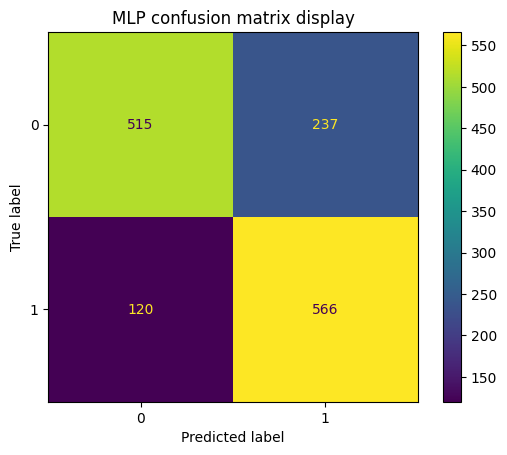

In [58]:
MLP_cm = confusion_matrix(y_test, y_pred_mlp)
MLP_disp = ConfusionMatrixDisplay(confusion_matrix=MLP_cm)
print(MLP_cm)
print("="*40)
MLP_disp.plot()
plt.title("MLP confusion matrix display")
plt.show()

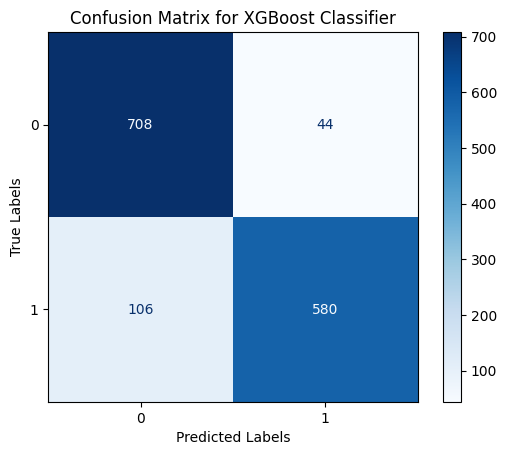

In [59]:
# Define the models in the dictionary with only the XGBoost classifier
bs_model = {
    "XGBClassifier": XGBClassifier(),
}

# Train the XGBoost classifier on the training data
xgb_classifier = bs_model["XGBClassifier"]
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data using the XGBoost classifier
y_pred_xgb = xgb_classifier.predict(X_test)

# Create the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display the confusion matrix using a heatmap
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_classifier.classes_)
disp_xgb.plot(cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()


**Calculating the precision, recall and f1 score**

In [60]:
# Finding the precision, recall, F1-score
ML_models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbor": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(),
    "xgboost classifier": XGBClassifier(),
    "AdaBoost classfier": AdaBoostClassifier(learning_rate=1),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=1),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(learning_rate=1)
}

for model_name, ML_models in ML_models.items():
  # Training and evaluating each model
  np.random.seed(42)
  ML_models.fit(X_train, y_train)
  y_pred = ML_models.predict(X_test)

  # calculate the precision, recall, and f1-score
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f"Model: {model_name}")
  print(f"Precision: {precision:.2f}")
  print(f"F1-score: {f1:.2f}")
  print(f"Recall: {recall:.2f}")
  print("="*30)

Model: Decision Tree
Precision: 0.76
F1-score: 0.78
Recall: 0.81
Model: Random Forest
Precision: 0.86
F1-score: 0.88
Recall: 0.89
Model: K-Nearest Neighbor
Precision: 0.72
F1-score: 0.82
Recall: 0.96
Model: Support Vector Machine
Precision: 0.64
F1-score: 0.68
Recall: 0.72
Model: xgboost classifier
Precision: 0.93
F1-score: 0.89
Recall: 0.85
Model: AdaBoost classfier
Precision: 0.70
F1-score: 0.73
Recall: 0.76
Model: Gradient Boosting
Precision: 0.86
F1-score: 0.85
Recall: 0.84
Model: Hist Gradient Boosting
Precision: 0.89
F1-score: 0.88
Recall: 0.87


**MODELLING USING ARTIFICIAL NEURAL NETWORK**

In [61]:
# importing necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [70]:
# initialize the artificial neural network
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=6, activation = 'relu', kernel_initializer = 'uniform', input_dim=14))
classifier.add(tf.keras.layers.Dense(units=6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(tf.keras.layers.Dense(units=1, kernel_initializer = 'uniform', activation = 'sigmoid'))

**Visualizing the Artificial Neural Network**




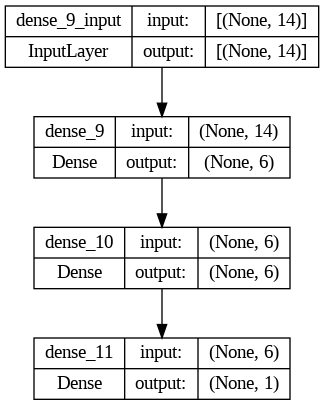

In [71]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [72]:
# compile the ANN
# Define the Adam optimizer with a specific learning rate
learning_rate = 0.1
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
classifier.compile(optimizer= adam_optimizer, loss= 'binary_crossentropy',
                  metrics= ['accuracy'])

In [73]:
# Fitting the Artificial Neural Network into the Training set
classifier.fit(X_train, y_train, batch_size=64, epochs=100)


Epoch 1/100
90/90 [==============================] - 1s 2ms/step - loss: 0.6536 - accuracy: 0.6141
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.6475
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.6537
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.6595
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.6452
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.6628
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.6423
Epoch 8/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.6687
Epoch 9/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.6597
Epoch 10/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.6553
Epoch 11/

In [74]:
# evaluation of X_test and y_test respectively
loss, accuracy = classifier.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


45/45 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.6822
Test Loss: 0.5991, Test Accuracy: 0.6822


In [75]:
# predicting the test Results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
pd.DataFrame(list(zip(y_test, y_pred)), columns = ['Actual', 'Predicted'])

45/45 [==============================] - 0s 2ms/step


,Actual,Predicted
0,1,[True]
1,1,[True]
2,1,[True]
3,0,[False]
4,0,[False]
...,...,...
1433,0,[False]
1434,0,[True]
1435,0,[True]
1436,0,[True]


In [76]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
# printing the accuracy for the predictions
print('Test Accuracy:', accuracy)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Test Accuracy: 0.6821975111961365
Accuracy: 0.6821975111961365
Precision: 0.671664167916042
Recall: 0.6530612244897959
F1 Score: 0.881180811808118


**Confusion Matrix for the Artificial Neural Network**

[[708  44]
 [106 580]]


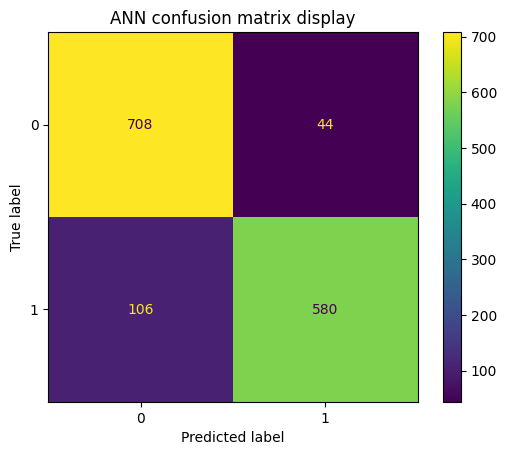

In [82]:
ANN_cm = confusion_matrix(y_test, y_pred)
ANN_disp = ConfusionMatrixDisplay(confusion_matrix=ANN_cm)
print(ANN_cm)
print("="*40)
ANN_disp.plot()
plt.title("ANN confusion matrix display")
plt.show()

**VISUALIZATION OF ML MODELS AND NEURAL NETWORK**

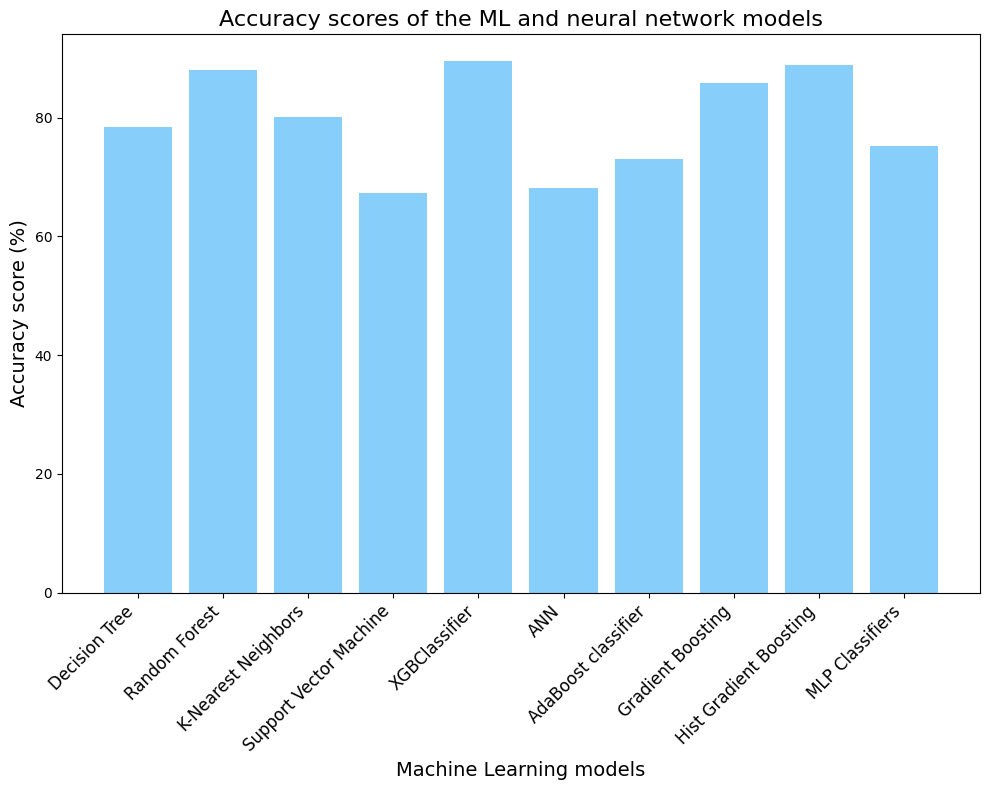

In [81]:
ML_models_scores = {
    "Decision Tree": 78.442,
    "Random Forest": 88.039,
    "K-Nearest Neighbors": 80.042,
    "Support Vector Machine": 67.385,
    "XGBClassifier": 89.569,
    "ANN": 68.219,
    "AdaBoost classifier": 73.018,
    "Gradient Boosting": 85.883,
    "Hist Gradient Boosting": 88.804,
    "MLP Classifiers": 75.174
}

# plot the accuracy scores of the models
plt.figure(figsize=(10,8))
plt.bar(ML_models_scores.keys(), ML_models_scores.values(), color="lightskyblue")
plt.xlabel("Machine Learning models", fontsize=14)
plt.ylabel("Accuracy score (%)", fontsize=14)
plt.title("Accuracy scores of the ML and neural network models", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

**Feature Importance for the Best model**

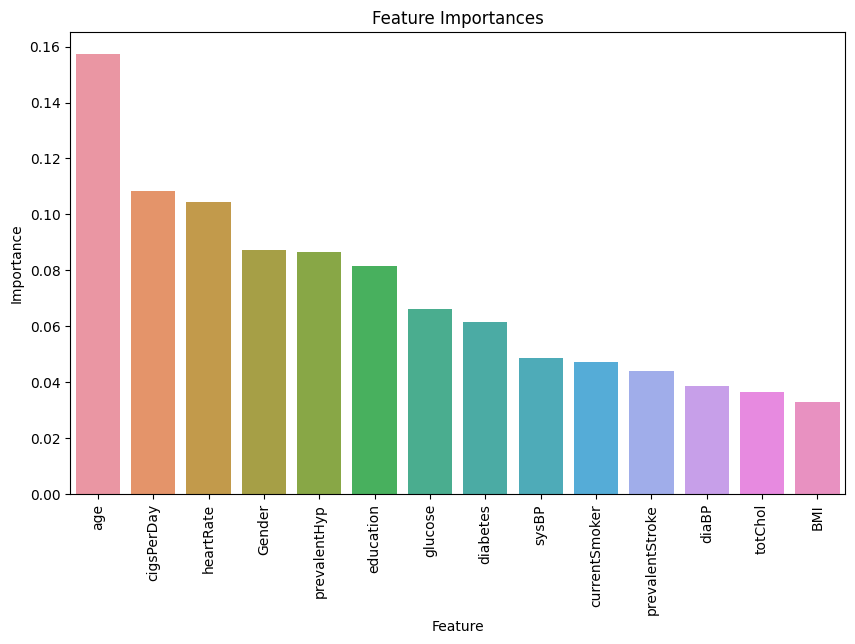

In [79]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Getting feature importances
feature_importances = xgb_model.feature_importances_

# Creating a DataFrame of feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importances_df)
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation='vertical')
plt.show()